# Homework 2 #
### Yuqian Gong ###

In [185]:
import numpy as np
import scipy.stats as sts

pts = np.loadtxt('incomes.txt')

## Quesiton 1 ##

#### (a) ####

<IPython.core.display.Javascript object>


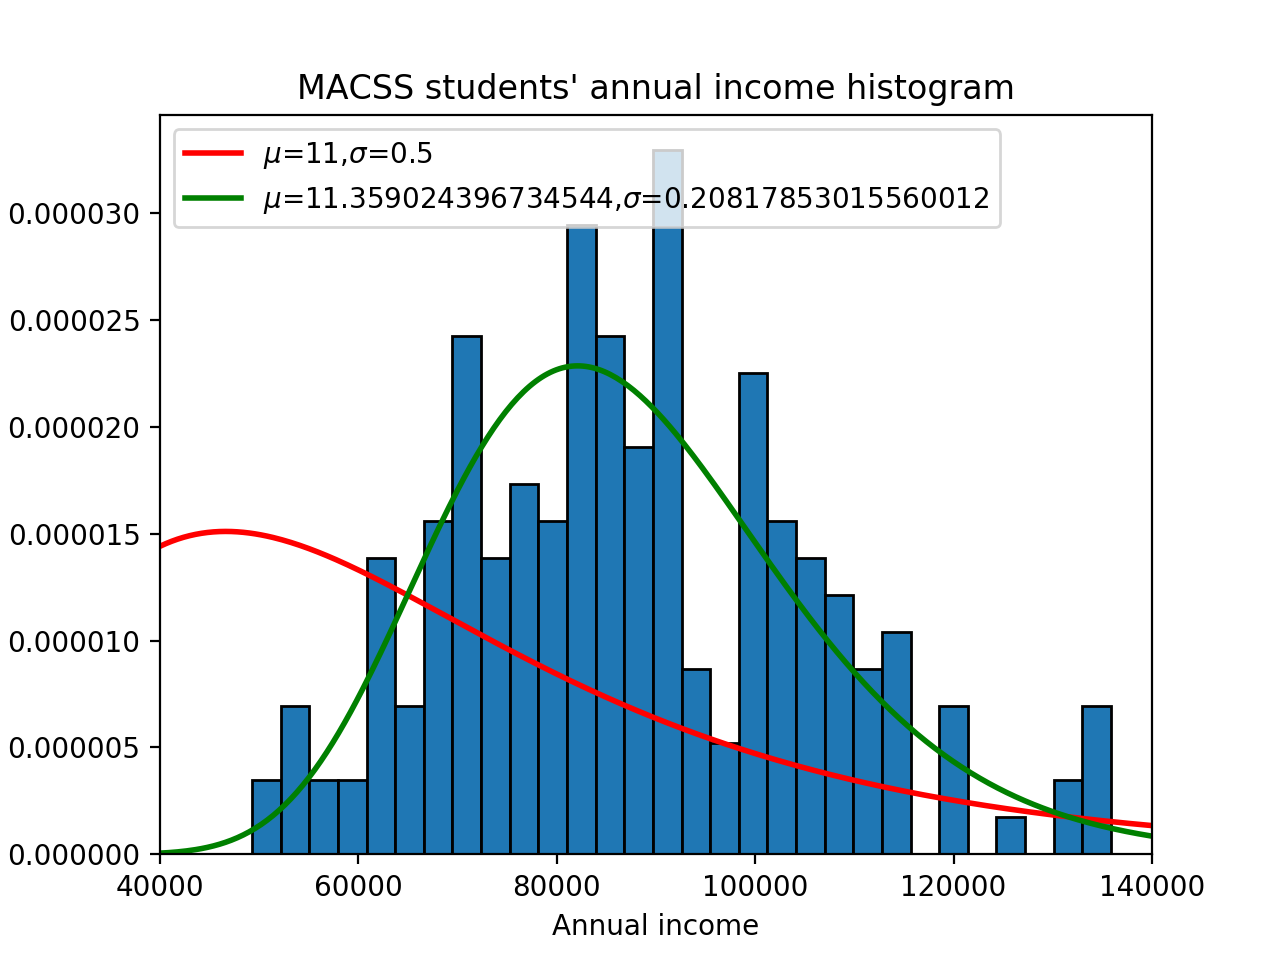

(40000, 140000)

In [186]:
import matplotlib.pyplot as plt
%matplotlib notebook
plt.figure(1)
count, bins, ignored = plt.hist(pts, 30, edgecolor = "black", normed = True)
plt.title("MACSS students' annual income histogram")
plt.xlabel("Annual income")
plt.ylabel('percentage of income')
plt.xlim([40000, 140000])

#### (b) ####

In [187]:
#2
def lognormal_pdf(xvals, mu, sigma):
    pdf_vals = (1/(xvals * sigma * np.sqrt(2 * np.pi))) * \
               np.exp(-(np.log(xvals) - mu)**2 / (2 * sigma **2))
    return pdf_vals

dist_pts = np.linspace(0, 150000, 500)
mu = 11
sigma = 0.5

def plot_pdf(mu, sigma, dist_pts, color):
    plt.figure(1)
    plt.plot(dist_pts, lognormal_pdf(dist_pts, mu, sigma),
            linewidth=2, color= color, label='$\mu$={},$\sigma$={}'.format(mu, sigma))
    plt.legend(loc='upper left')
    
plot_pdf(mu, sigma, dist_pts, 'r')
    
    

/Users/Nancygong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Nancygong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Nancygong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


In [188]:
def log_lik_lognormal(xvals, mu, sigma):
    pdf_vals = lognormal_pdf(xvals, mu, sigma)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val

log_lik_val = log_lik_lognormal(pts, mu, sigma)
print("The log likelihood value for the parameterization of this distribution \
and given this data is", log_lik_val)

The log likelihood value for the parameterization of this distribution and given this data is -2385.85699781


#### (c) ####

In [189]:
def crit(params, *args):
    mu, sigma = params
    xvals = args[0]
    log_lik_val = log_lik_lognormal(xvals, mu, sigma)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

In [190]:
import scipy.optimize as opt

def find_optimization(function, params_init, mle_args):
    results = opt.minimize(function, params_init, args = (mle_args), method='L-BFGS-B',
                          bounds = ((None, None), (0.1, None)))
    return results



In [191]:
results = find_optimization(crit, np.array([11, 0.5]), mle_args = (pts,))
mu_MLE, sigma_MLE = results.x
plot_pdf(mu_MLE, sigma_MLE, dist_pts, 'g')
log_lik_val_2 = log_lik_lognormal(pts, mu_MLE, sigma_MLE)
OffDiagNeg = np.array([[1, -1], [-1, 1]])
vcv_mle = results.hess_inv * OffDiagNeg
print("The ML estimates for mu and sigma are {} {}".format(mu_MLE, sigma_MLE))
print("The value of the likelihood function is {}".format(log_lik_val_2))
print("The variance-covariance matrix is {}".format(vcv_mle))


The ML estimates for mu and sigma are 11.359024396734544 0.20817853015560012
The value of the likelihood function is -2241.71930136852
The variance-covariance matrix is [[ 0.00022521 -0.00022521]
 [-0.00010284  0.00010284]]


/Users/Nancygong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Nancygong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Nancygong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


#### (d) ####

In [192]:
log_lik_val_h0 = log_lik_lognormal(pts, 11, 0.5)
log_lik_val_mle = log_lik_lognormal(pts, mu_MLE, sigma_MLE)
LR_val = 2 * (log_lik_val_mle - log_lik_val_h0)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 2)
print('chi squared of H0 with 2 degrees of freedom p-value = ', pval_h0)

chi squared of H0 with 2 degrees of freedom p-value =  0.0


#### (e) ####

In [193]:
import scipy.integrate as intgr
xfx = lambda x: lognormal_pdf(x, mu_MLE, sigma_MLE)
result1 = intgr.quad(xfx, 0, 100000)
prob_more_than_100000 = 1 - result1[0]
result2 = intgr.quad(xfx, 0, 75000)
prob_less_than_75000 = result2[0]
print("The probability that you will earn more than 100000 is {}".format(prob_more_than_100000))
print("The probability that you will earn less than 75000 is {}".format(prob_less_than_75000))

The probability that you will earn more than 100000 is 0.229870180558167
The probability that you will earn less than 75000 is 0.2602332979233366


## Question 2 ##

#### (a) ####

In [195]:
data = np.loadtxt("sick.txt", delimiter = ",", skiprows = 1)

def log_lik_error(data, param_array, b_0, sigma):
    err_array = np.dot(data, param_array) - b_0
    sum_squa = np.sum(err_array ** 2)
    n = len(data)
    log_lik_val = log_lik_val = -n*np.log(sigma)-n/2*np.log(2*np.pi)-1/(2*sigma**2)\
    *sum_squa
    return log_lik_val   

In [197]:
def crit_reg(reg_params, *args):
    reg_params = reg_params.T
    v = reg_params[1:-1] * (-1)
    b_0 = reg_params[0]
    param_array = np.insert(v, 0, 1)
    sigma = reg_params[-1]
    data = args[0]
    log_lik_val = log_lik_error(data, param_array, b_0, sigma)
    neg_log_lik_val = - log_lik_val
    return neg_log_lik_val
    

In [198]:
def find_optimal(function, params_init, mle_args):
    results = opt.minimize(function, params_init, args = (mle_args), method='L-BFGS-B',
                          bounds = ((0.001, None), (0.01, None), (0.01, None), (None , -0.005),\
                                   (0.001, None)))
    return results

results_reg = find_optimal(crit_reg, params_init = np.array([0.001, 0, 0, 0, 0.001]), mle_args = (data, ))
reg_params = results_reg.x 
beta0 = reg_params[0]
beta1 = reg_params[1]
beta2 = reg_params[2]
beta3 = reg_params[3]
sigma = reg_params[4]
OffDiagNeg = np.eye(5)*2-1
vcv_mle = results_reg.hess_inv * OffDiagNeg
log_lik_val= -crit_reg(reg_params, (data,))
print("The estimated parameters for beta0, beta1, beta2, beta3 and simga is about {}, \
{}, {}, {}, {}".format(beta0, beta1, beta2, beta3, sigma))
print("The corresponding log likelihood is about {}".format(log_lik_val))
print("The estimated variance covariance matrix is about {}".format(vcv_mle))

The estimated parameters for beta0, beta1, beta2, beta3 and simga is about 0.2516450076079702, 0.012933473821140372, 0.4005009401572763, -0.009991716603756598, 0.003017654878584944
The corresponding log likelihood is about -95.11794933829647
The estimated variance covariance matrix is about [[  837.11323874   727.43566738  -885.45321073   490.07145075   564.9214264 ]
 [  482.74016969   419.49245579  -510.61643942   282.61102635
    325.77486705]
 [-4728.60045586 -4109.06818686  5001.65776324 -2768.26907122
  -3191.07321216]
 [ -284.19773172  -246.96265842   300.60899145  -166.37812509
   -191.78945106]
 [  -42.3534468    -36.80450846    44.79915977   -24.7951418    -28.58210978]]


#### (b) ####

In [181]:
h0 = np.array([1, 0, 0, 0, 0.01])
log_lik_h0 = -crit_reg(h0, (data,))
log_lik_mle = -crit_reg(reg_params, (data,))
LR_val = 2 * (log_lik_mle - log_lik_h0)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 5)
print('chi squared of H0 with 5 degrees of freedom p-value =  ', pval_h0)
print("Age, number of children, average of temperature should have effect on the number of sick days")

chi squared of H0 with 5 degrees of freedom p-value =   0.0
Age, number of children, average of temperature should have effect on the number of sick days
